In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
##### BUSINESS PROBLEM DESCRIPTION
## Ha senso investire soldi per fare advertising per ristorazione con i coupon attraverso le metriche
## raccolte dai dispositivi di geolocalizzazione? Sarebbe un business model monetizzabile? 
## Quale segmento di clientela potrebbe essere più responsive alla call to action? 
## Che abitudini ha la clientela che sarebbe responsive? 
## Che caratteristiche deve avere il coupon per essere interessante? (Distanza, Expiration date, 
# Tipologia di ristorante, Comodità per l'utente in viaggio [direzione], 
# Dove sta andando l'utente [destinazione], con chi è [passenger (magari giovani con amici che stanno uscendo a divertirsi????)])
######## Lavoratori che vanno a lavoro? 
## Ci sarebbe un periodo 


##### GENERAL STUFF 
## A noi interessa essere più accurati sullo scoprire quelli che useranno il coupon o quello che non lo useranno?
## ne dipende la metrica del modello, e le implicazioni di business sul come agire (nel caso si usino risorse per 
## inviare i coupon ci piacerebbe evitare che vengano sprecati e non inviarli a chi non li userebbe)

##### VARIABLES
## Weather not distributed evenly so i'd say not statistically relevant
## Time, seems like 7AM and 10PM don't offer any insights (orari strambi per mangiare)
## Coupon type, "Carry out & Take away" and "Restaurant <20" are extremely good performers, while Bars suck
## Expiration, 1day is performing extremely good, the other one not relevant
## Gender, males are 59, females 54, seems not relevant
## Age, don't really know what to do, all positive, below21 most performing
## maritalStatus, mostly positive but singles have 60, widowed and diverced are useless because of sample size
## has_children, no children have 0
## education, not really statistical, might be useful to feature engineer into overHighschool, underHighschool
## income, lesser income

##### FEATURE ENGINEERING
## GEQ Variables just one feature 
## direction Variables just one feature 
## Implicazioni di business nel capire 
## Interaction between GEQ and Direction (and maybe Expiration, [Vizualization on these ones]) 
## Education feature engineer into overHighschool, underHighschool

In [2]:
df = pd.read_csv("Vehicle Coupon Recommendation.csv")

In [13]:
df.drop("car",axis=1,inplace=True)

In [30]:
df.isna().sum()

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

In [66]:
df["education"].value_counts()

Some college - no degree                  4351
Bachelors degree                          4335
Graduate degree (Masters or Doctorate)    1852
Associates degree                         1153
High School Graduate                       905
Some High School                            88
Name: education, dtype: int64

In [63]:
def educ(x):
    if x in ["Some college - no degree","Associates degree","High School Graduate","Some High School"]:
        return "low"
    elif x in ["Graduate degree (Masters or Doctorate)","Bachelors degree"]:
        return "high"

In [64]:
df["educlvl"] = df["education"].apply(educ)

(-1.1038233124814194,
 1.1073300106205075,
 -1.106156939761134,
 1.1002931876076731)

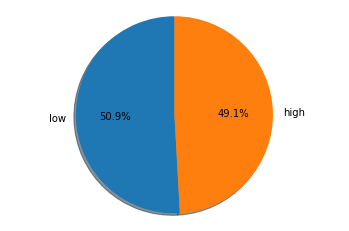

In [65]:
sizes = df["educlvl"].value_counts()
explode = (0,0,0)

fig1, ax1 = plt.subplots(1)
ax1.pie(sizes,labels=sizes.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

In [48]:
len(df)

12684

(-1.1117837432240012,
 1.1151344617184509,
 -1.1278946171723707,
 1.1013283211616596)

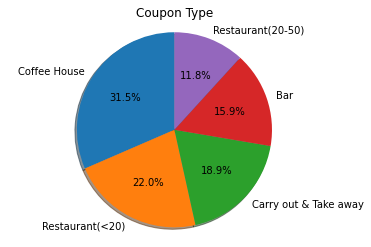

In [69]:
sizes = df["coupon"].value_counts()
explode = (0,0,0)

fig1, ax1 = plt.subplots(1)
ax1.set_title("Coupon Type")
ax1.pie(sizes,labels=sizes.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

(-1.1014025659423399,
 1.1033365724471815,
 -1.1023389664250711,
 1.1001113793535748)

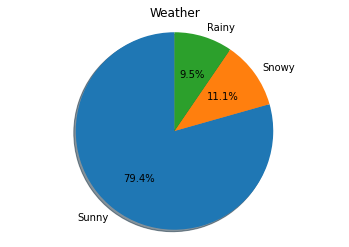

In [68]:
sizes = df["weather"].value_counts()
explode = (0,0,0)

fig1, ax1 = plt.subplots(1)
ax1.set_title("Weather")
ax1.pie(sizes, explode=explode,labels=sizes.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

In [24]:
df.dropna().shape[0] / df.shape[0]

0.9523021128981394

In [5]:
def clear(x):
    if x == "Less than $12500":
        return "12499"
    elif x == "$12500 - $24999":
        return "12500"
    elif x == "$25000 - $37499":
        return "25000"
    elif x == "$37500 - $49999":
        return "37500"
    elif x == "$50000 - $62499":
        return "50000"
    elif x == "$62500 - $74999":
        return "62500"
    elif x == "$75000 - $87499":
        return "75000"
    elif x == "$87500 - $99999":
        return "87500"
    elif x =="$100000 or More":
        return "more than 100k"

In [99]:
def rich(x):
    if x in ["62500","75000","87500","more than 100k"]:
        return 1
    else:
        return 0
def middle(x):
    if x in ["25000","37500","50000"]:
        return 1
    else:
        return 0
def poor(x):
    if x in ["12499","12500"]:
        return 1
    else:
        return 0

In [102]:
df["income"]= df["income"].apply(clear)

In [104]:
df["rich"] = df["income"].apply(rich)
df["middleclass"] = df["income"].apply(middle)
df["poor"] = df["income"].apply(poor)

rich           0.539917
poor           0.581274
middleclass    0.584261
Name: Wealth, dtype: float64


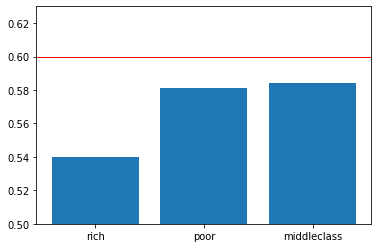

In [167]:
show = {}

count = df[["rich","middleclass","poor"]].sum()

for val in count.index:
    show[val] = (df[df[val]==1]["Y"].sum() / df[df[val]==1]["Y"].count())
ser = pd.Series(show,name="Wealth")
f, ax = plt.subplots(1)
ser = ser.sort_values(ascending=True)
plt.axhline(y=0.60,linewidth=1, color='red')
plt.bar(ser.index,ser)
ax.set_ylim(ymin=0.50)
print(ser.sort_values())

rich           4334
middleclass    5477
poor           2873
dtype: int64


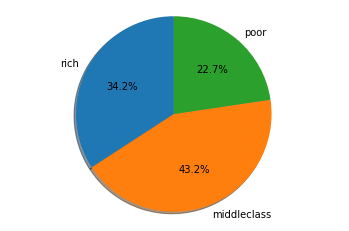

In [155]:
sizes = df[["rich","middleclass","poor"]].sum()
explode = (0, 0, 0)

fig1, ax1 = plt.subplots(1)
ax1.pie(sizes, explode=explode,labels=sizes.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

print(df[["rich","middleclass","poor"]].sum())

(-1.2202963239941453,
 1.1118001307821304,
 -1.1121077874372518,
 1.1835236307282337)

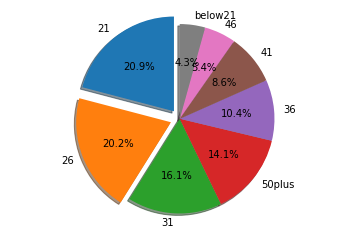

In [61]:
sizes = df["age"].value_counts()
explode = (0.1, 0.1, 0,0,0,0,0,0)

fig1, ax1 = plt.subplots(1)
ax1.pie(sizes, explode=explode,labels=sizes.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

In [112]:
df["age0"] = df["age"].apply(lambda x: 1 if x =="below21" else 0)
df["age21"] = df["age"].apply(lambda x: 1 if x in ["21","26"] else 0)
df["age31"] = df["age"].apply(lambda x: 1 if x in ["31","36"] else 0)
df["age41"] = df["age"].apply(lambda x: 1 if x in ["41","46"] else 0)
df["age51"] = df["age"].apply(lambda x: 1 if x in ["50plus"] else 0)

50plus     0.508949
36         0.535254
31         0.546346
41         0.572736
46         0.575802
26         0.595936
21         0.598191
below21    0.634369
Name: Age, dtype: float64


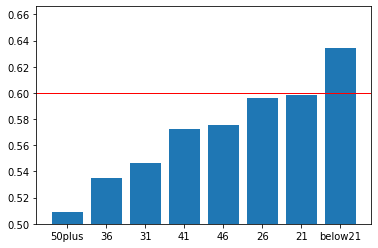

In [44]:
show = {}
for val in df["age"].unique():
    show[val]=(df[df["age"]==val]["Y"].sum() / df[df["age"]==val]["Y"].count())
ser = pd.Series(show,name="Age")
f, ax = plt.subplots(1)
ser = ser.sort_values(ascending=True)
plt.axhline(y=0.60,linewidth=1, color='red')
plt.bar(ser.index,ser)
ax.set_ylim(ymin=0.50)
print(ser.sort_values())

Potrebbe essere interessante capire come mai i 50plus sono il 14% ma performano così male

31, 26 e 21 rappresentano più della metà delle persone intervistate, ma 31 ha meno adesione, quindi guardiamo 26 e 21.

<BarContainer object of 9 artists>

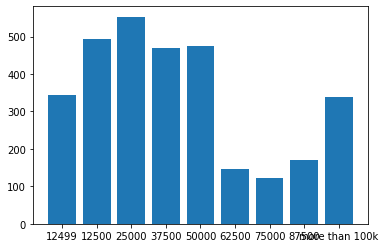

In [78]:
ser = df[df["age"].isin(["21","26"]) & df["Y"]==1]["income"].value_counts().sort_index()
plt.bar(ser.index,ser)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

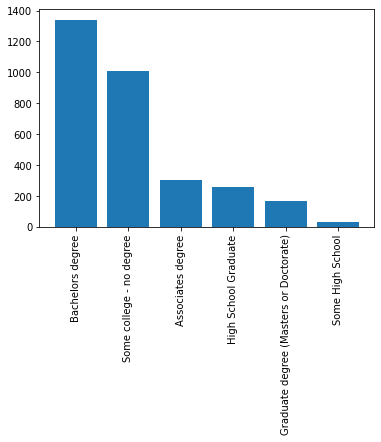

In [82]:
ser = df[df["age"].isin(["21","26"]) & df["Y"]==1]["education"].value_counts()
plt.bar(ser.index,ser)
plt.xticks(rotation='vertical')

<BarContainer object of 2 artists>

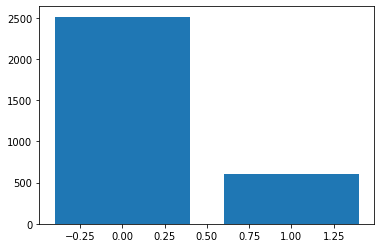

In [83]:
ser = df[df["age"].isin(["21","26"]) & df["Y"]==1]["has_children"].value_counts()
plt.bar(ser.index,ser)

<BarContainer object of 5 artists>

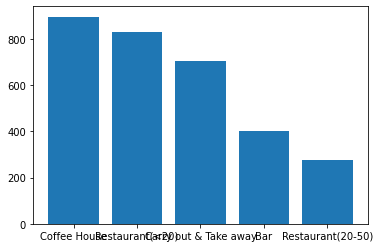

In [84]:
ser = df[df["age"].isin(["21","26"]) & df["Y"]==1]["coupon"].value_counts()
plt.bar(ser.index,ser)

<BarContainer object of 5 artists>

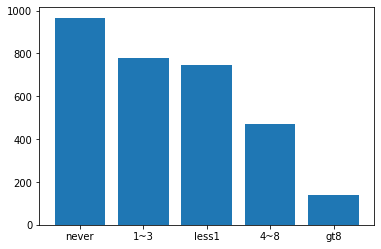

In [87]:
ser = df[df["age"].isin(["21","26"]) & df["Y"]==1]["Bar"].value_counts()
plt.bar(ser.index,ser)

<BarContainer object of 5 artists>

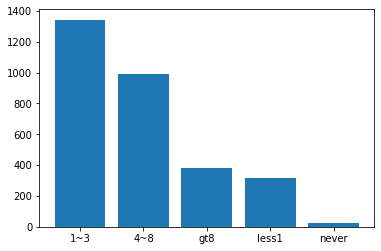

In [88]:
ser = df[df["age"].isin(["21","26"]) & df["Y"]==1]["CarryAway"].value_counts()
plt.bar(ser.index,ser)

<BarContainer object of 5 artists>

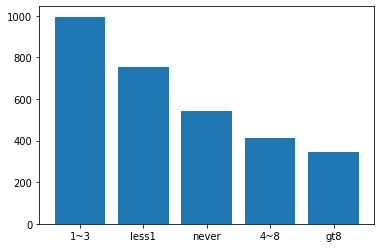

In [89]:
ser = df[df["age"].isin(["21","26"]) & df["Y"]==1]["CoffeeHouse"].value_counts()
plt.bar(ser.index,ser)

In [91]:
young = df[df["age"].isin(["21","26"])]

In [118]:
found = pd.pivot_table(young,index=["RestaurantLessThan20","coupon"],values="Y")
found[found["Y"] > 0.75]

Y
RestaurantLessThan20 coupon                         
gt8                  Carry out & Take away  0.752688
                     Restaurant(<20)        0.817391
never                Carry out & Take away  0.866667

In [121]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y', 'rich', 'middleclass', 'poor',
       'age0', 'age21', 'age31', 'age41', 'age51'],
      dtype='object')

In [131]:
pd.pivot_table(df[df["age0"]==1],index=["passanger"],values="Y")

,Y
passanger,
Alone,0.611570
Friend(s),0.712121
Partner,0.596154


In [186]:
some = []
for col in ['rich', 'middleclass', 'poor','age0', 'age21', 'age31', 'age41', 'age51']:
  for col2 in ['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
    'expiration', 'gender', 'maritalStatus', 'has_children',
    'Bar', 'CoffeeHouse',
    'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
    'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
    'direction_same', 'direction_opp']:
    found = pd.pivot_table(df[df[col]==1],index=[col2],values="Y")
    if not ((found[found["Y"]>0.70]).empty):
        some.append((col,(found[found["Y"]>0.70])))


######### CHECK DURING WINTER WHAT PLACE PREFERRED, AND CHECK AT WHAT TIME WHAT PLACE PREFERRED
######### CHECK POPULATION WITH CHILDREN WHAT PREFERS
######### 


In [187]:
some

[('rich',
                                Y
  coupon                         
  Carry out & Take away  0.702439),
 ('middleclass',
                                Y
  coupon                         
  Carry out & Take away  0.753196
  Restaurant(<20)        0.738294),
 ('middleclass',
                           Y
  Restaurant20To50          
  4~8               0.721591),
 ('poor',
                                Y
  coupon                         
  Carry out & Take away  0.751799),
 ('poor',
                           Y
  Restaurant20To50          
  4~8               0.812183),
 ('age0',
                    Y
  passanger          
  Friend(s)  0.712121),
 ('age0',
                     Y
  temperature         
  80           0.72242),
 ('age0',
               Y
  time          
  2PM   0.702703),
 ('age0',
                                Y
  coupon                         
  Carry out & Take away  0.728070
  Restaurant(<20)        0.734375),
 ('age0',
                      Y
  Coffee

<BarContainer object of 4 artists>

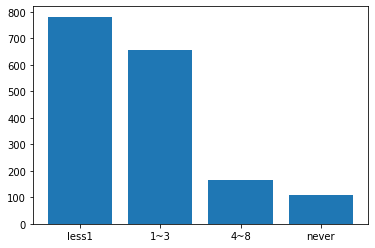

In [110]:
ser = df[df["income"]=="more than 100k"]["Restaurant20To50"].value_counts()
plt.bar(ser.index,ser)


Lets get a general look at the accepted the coupons

<BarContainer object of 5 artists>

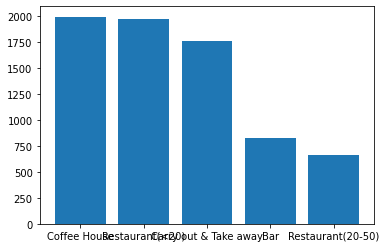

In [86]:
ser = df[df["Y"]==1]["coupon"].value_counts()
plt.bar(ser.index,ser)

In [7]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [69]:
df.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

In [108]:
pd.pivot_table(df, values='Y', index=['maritalStatus'], aggfunc=np.mean)

,Y
maritalStatus,
Divorced,0.529070
Married partner,0.542941
Single,0.605850
Unmarried partner,0.561299
Widowed,0.476923
